# First stage of Sempli project: Cleaning the data

In [1]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import seaborn as sns

### Loading the data

In this part of the project we are loading the excel file and normalizing the json format presented in the columns 'expected_detail' and 'paid_detail'

After normalizing the data we delete rows where the state of the client were 'GRACE' or 'PENDING' because of the COVID situation present at the moment of the study ('GRACE'), and the missing values presented on 'PENDING'

In [18]:
path_file = "data_sempli_holberton.xlsx"
cols = ['client_id',
        'loan_schedule_id',
        'loan_id',
        'index',
        'expected_date',
        'state',
        'arrears_days',
        'paid_date',
        'expected_detail',
        'paid_detail']
data = pd.read_excel(path_file, sheet_name = 1, header = 0, usecols = cols).replace('NaT', np.nan)

def normalize_data(df, col_name):
    data = df[col_name].apply(json.loads)
    return pd.json_normalize(data)

expected = normalize_data(data,'expected_detail')
paid = normalize_data(data,'paid_detail')
data = data.join(expected).join(paid, rsuffix='_paid')
data = data[data.state != "GRACE"]
data = data[data.state != "PENDING"]
data.head(2)

,client_id,loan_schedule_id,loan_id,index,expected_date,state,arrears_days,paid_date,expected_detail,paid_detail,...,taxRetentionPercentage_paid,fngTotal_paid,fngValue_paid,fngPercent_paid,fngVatValue_paid,legalCharge_paid,fngVatPercent_paid,preLegalCharge_paid,feesPaid_paid,monthlyDeferredInterest_paid
1,2442,13696,592,6,2019-03-18,PAID,0,2019-03-18,"{""total"": 22872996.50, ""penalty"": 0, ""interest...","{""total"": 22872996.50, ""penalty"": 0, ""interest...",...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9273,43776,1831,3,2020-03-04,PAID,5,2020-03-09,"{""total"": 7322168.42, ""penalty"": 0, ""fngTotal""...","{""total"": 7322168.42, ""penalty"": 0, ""fngTotal""...",...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Deleting unnecessary columns

After taking a look at the data, we came to the conclusion to use total_paid and total_expected values and delete the other variable presented on 'data_droped_columns'

In [19]:
data_droped_columns = ['penalty', 'interest', 'insurance', 'principal', 'taxRetentionValue',
                       'taxRetentionPercentage', 'legalCharge', 'preLegalCharge', 'feesPaid',
                       'fngTotal', 'fngValue',
                       'fngPercent', 'fngVatValue', 'fngVatPercent', 'monthlyDeferredInterest',
                       'penalty_paid', 'interest_paid', 'insurance_paid',
                       'principal_paid', 'taxRetentionValue_paid',
                       'taxRetentionPercentage_paid', 'legalCharge_paid',
                       'preLegalCharge_paid', 'feesPaid_paid', 'fngTotal_paid',
                       'fngValue_paid', 'fngPercent_paid', 'fngVatValue_paid',
                       'fngVatPercent_paid', 'monthlyDeferredInterest_paid']
data = data.drop(columns=data_droped_columns)
data.head(2)

,client_id,loan_schedule_id,loan_id,index,expected_date,state,arrears_days,paid_date,expected_detail,paid_detail,total,total_paid
1,2442,13696,592,6,2019-03-18,PAID,0,2019-03-18,"{""total"": 22872996.50, ""penalty"": 0, ""interest...","{""total"": 22872996.50, ""penalty"": 0, ""interest...",22872996.50,22872996.50
2,9273,43776,1831,3,2020-03-04,PAID,5,2020-03-09,"{""total"": 7322168.42, ""penalty"": 0, ""fngTotal""...","{""total"": 7322168.42, ""penalty"": 0, ""fngTotal""...",7322168.42,7322168.42


### checking normalized values
After deleting the some columns, we check if the 'total' and 'total_paid' match to the one on 'expected_detail' for 'total' and 'paid_detail' for 'total_paid'

The next step is delete the rows with json format and organize the data by 'client_id'

In [20]:
unused_columns = ['expected_detail', 'paid_detail']
data = data.drop(columns=unused_columns)
data = data.sort_values(by='client_id', ascending=True)
data.head(2)

,client_id,loan_schedule_id,loan_id,index,expected_date,state,arrears_days,paid_date,total,total_paid
861,14,82,14,8,2017-12-27,PAID,0,2017-12-27,1497723.06,1497723.06
5477,14,77,14,3,2017-07-27,PAID,0,2017-07-27,1497723.06,1497723.06


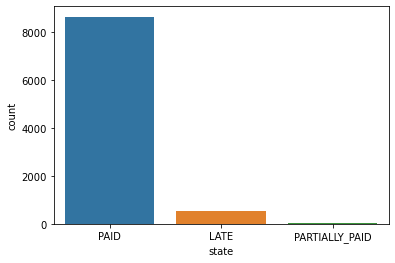

In [21]:
sns.countplot(x='state', data= data)

## Export data dataframe to an excel file

In [22]:
data.to_excel('output.xlsx')